In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("players_21.csv")
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [2]:
#データの全体像把握
df.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,...,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,...,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,...,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,...,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,...,38.750000,50.000000,NaN,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,232314.500000,25.000000,181.000000,75.000000,1.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,...,49.000000,59.000000,NaN,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,246760.250000,29.000000,186.000000,80.000000,1.000000,70.000000,75.000000,1.800000e+06,7000.000000,1.000000,...,60.000000,66.000000,NaN,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,258970.000000,53.000000,206.000000,110.000000,4.000000,93.000000,95.000000,1.055000e+08,560000.000000,5.000000,...,92.000000,96.000000,NaN,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB


<AxesSubplot:xlabel='nationality', ylabel='potential'>

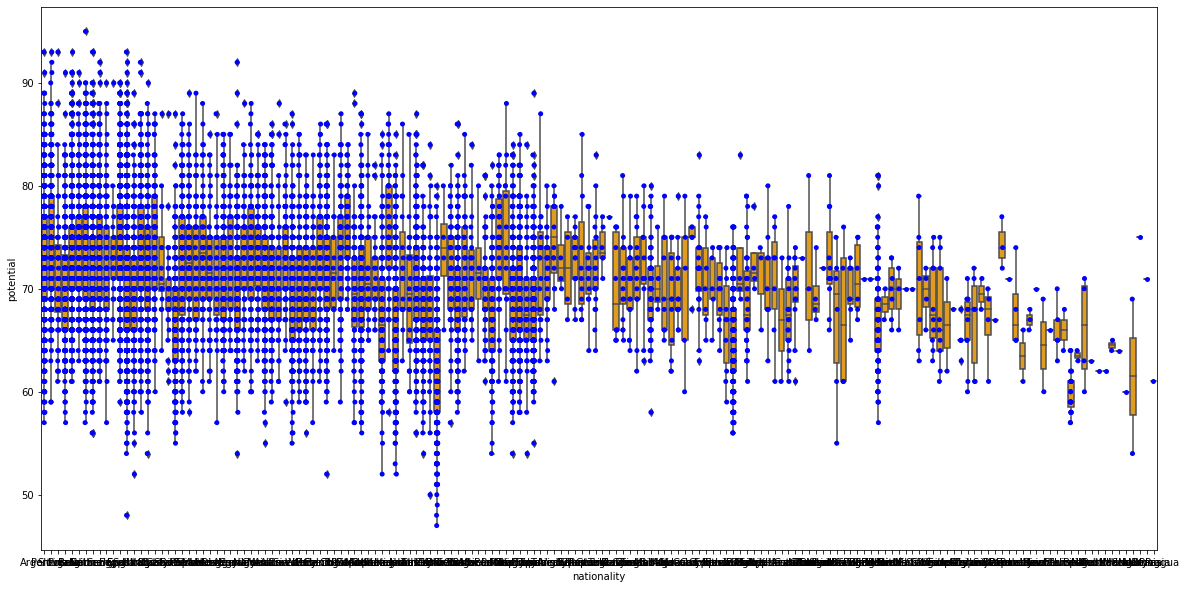

In [13]:
#国ごとに箱ひげ図を見てみる
plt.figure(figsize=(20,10))

plt.subplot(1, 1, 1)
sns.boxplot(data=df, y="potential", x="nationality", color="orange")
sns.stripplot(data=df, y="potential", x="nationality", color="blue")

In [18]:
df.groupby("nationality").mean().sort_values(by="potential", ascending=False)

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
nationality,,,,,,,,,,,,,,,,,,,,,
Tanzania,218066.000000,27.000000,183.000000,80.000000,1.000000,76.000000,77.000000,9.000000e+06,55000.000000,1.000000,...,70.000000,78.000000,NaN,28.000000,23.000000,12.000000,14.000000,9.000000,7.000000,9.000000
Russia,219723.285714,25.454545,183.311688,76.662338,1.060606,70.207792,75.987013,3.240779e+06,2797.402597,1.155844,...,49.116883,60.870130,NaN,51.597403,51.025974,19.324675,18.688312,18.909091,18.883117,19.493506
Ukraine,231484.292308,25.723077,183.215385,76.800000,1.061538,70.815385,75.553846,4.196154e+06,6732.307692,1.107692,...,47.015385,62.753846,NaN,50.769231,47.738462,17.892308,18.230769,18.415385,18.800000,19.384615
Malaysia,257888.000000,18.000000,170.000000,65.000000,1.000000,56.000000,75.000000,1.900000e+05,1000.000000,1.000000,...,59.000000,62.000000,NaN,16.000000,17.000000,12.000000,11.000000,7.000000,7.000000,11.000000
Portugal,222677.742210,25.413598,180.991501,73.951841,1.110482,69.804533,74.847025,4.603909e+06,14183.427762,1.195467,...,52.147309,63.974504,NaN,51.189802,48.342776,16.433428,16.453258,15.895184,16.099150,16.719547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Andorra,192937.000000,30.000000,184.000000,79.000000,1.000000,62.000000,62.000000,2.500000e+05,800.000000,1.000000,...,34.000000,56.000000,NaN,59.000000,64.000000,9.000000,7.000000,12.000000,8.000000,6.000000
Hong Kong,249149.500000,22.000000,174.500000,71.500000,1.000000,52.500000,61.500000,1.100000e+05,2000.000000,1.000000,...,41.000000,39.500000,NaN,43.500000,49.500000,9.000000,7.500000,7.500000,9.500000,9.500000
Nicaragua,238884.000000,25.000000,183.000000,82.000000,1.000000,56.000000,61.000000,1.200000e+05,500.000000,1.000000,...,55.000000,54.000000,NaN,31.000000,18.000000,13.000000,13.000000,8.000000,7.000000,11.000000


In [6]:
#日本人のみを抽出
df2 = df[df.nationality == "Japan"]

In [7]:
df2.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
853,205114,https://sofifa.com/player/205114/takashi-inui/...,T. Inui,乾 貴士,32,1988-06-02,169,69,Japan,SD Eibar,...,64+2,61+2,61+2,61+2,64+2,60+2,50+2,50+2,50+2,60+2
863,208520,https://sofifa.com/player/208520/hiroki-sakai/...,H. Sakai,酒井 宏樹,30,1990-04-12,183,70,Japan,Olympique de Marseille,...,76+2,74+2,74+2,74+2,76+2,76+2,75+2,75+2,75+2,76+2
981,226627,https://sofifa.com/player/226627/takumi-minami...,T. Minamino,南野 拓実,25,1995-01-16,174,67,Japan,Liverpool,...,60+2,57+2,57+2,57+2,60+2,56+2,48+2,48+2,48+2,56+2
1021,232862,https://sofifa.com/player/232862/shoya-nakajim...,S. Nakajima,中島 翔哉,25,1994-08-23,164,64,Japan,FC Porto,...,61+2,56+2,56+2,56+2,61+2,57+2,46+2,46+2,46+2,57+2
1266,232730,https://sofifa.com/player/232730/daichi-kamada...,D. Kamada,鎌田 大地,23,1996-08-05,180,72,Japan,Eintracht Frankfurt,...,59+2,56+2,56+2,56+2,59+2,55+2,47+2,47+2,47+2,55+2


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 853 to 18433
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 428.8+ KB


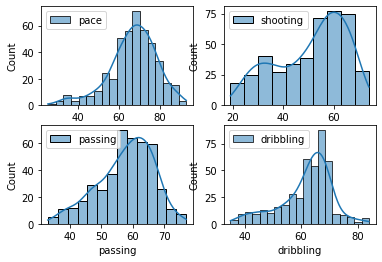

In [39]:
plt.subplot(2, 2, 1)
sns.histplot(df2["pace"],kde=True, label="pace")
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(df2["shooting"],kde=True, label="shooting")
plt.legend()

plt.subplot(2, 2, 3)
sns.histplot(df2["passing"],kde=True, label="passing")
plt.legend()

plt.subplot(2, 2, 4)
sns.histplot(df2["dribbling"],kde=True, label="dribbling")
plt.legend()

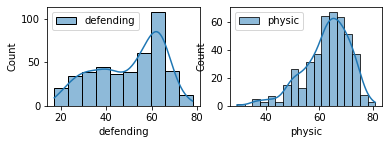

In [41]:
plt.subplot(2, 2, 1)
sns.histplot(df2["defending"],kde=True, label="defending")
plt.legend()

plt.subplot(2, 2, 2)
sns.histplot(df2["physic"],kde=True, label="physic")
plt.legend()

Text(0.5, 1.0, 'overall')

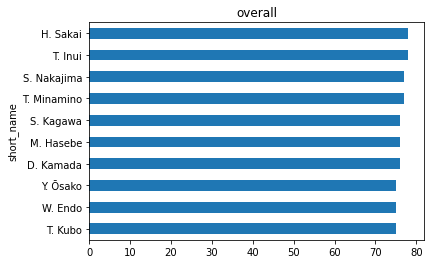

In [46]:
plt.subplot(1, 1, 1)
df2.sort_values(by="overall", ascending=False).head(10).set_index("short_name")["overall"].sort_values().plot(kind="barh")
plt.title("overall")

Text(0.5, 1.0, 'pace')

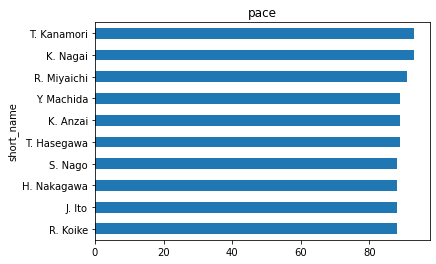

In [53]:
plt.subplot(1, 1, 1)
df2.sort_values(by="pace", ascending=False).head(10).set_index("short_name")["pace"].sort_values().plot(kind="barh")
plt.title("pace")

Text(0.5, 1.0, 'shooting')

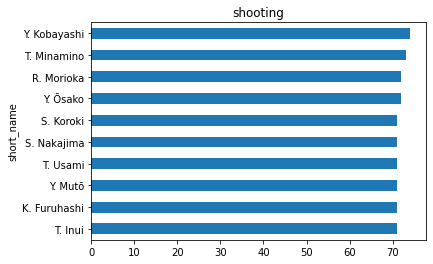

In [54]:
plt.subplot(1, 1, 1)
df2.sort_values(by="shooting", ascending=False).head(10).set_index("short_name")["shooting"].sort_values().plot(kind="barh")
plt.title("shooting")

Text(0.5, 1.0, 'passing')

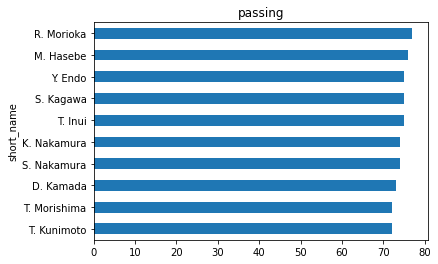

In [55]:
plt.subplot(1, 1, 1)
df2.sort_values(by="passing", ascending=False).head(10).set_index("short_name")["passing"].sort_values().plot(kind="barh")
plt.title("passing")

Text(0.5, 1.0, 'dribbling')

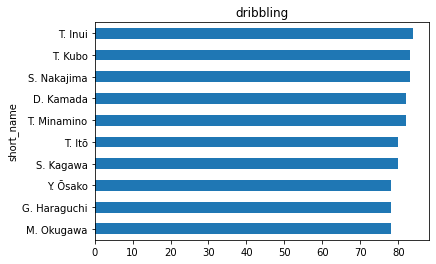

In [56]:
plt.subplot(1, 1, 1)
df2.sort_values(by="dribbling", ascending=False).head(10).set_index("short_name")["dribbling"].sort_values().plot(kind="barh")
plt.title("dribbling")

Text(0.5, 1.0, 'defending')

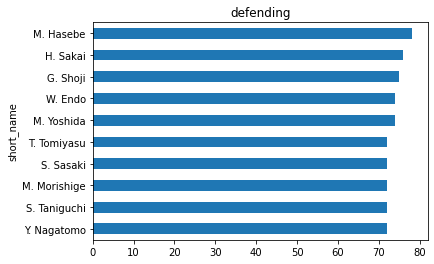

In [57]:
plt.subplot(1, 1, 1)
df2.sort_values(by="defending", ascending=False).head(10).set_index("short_name")["defending"].sort_values().plot(kind="barh")
plt.title("defending")

Text(0.5, 1.0, 'physic')

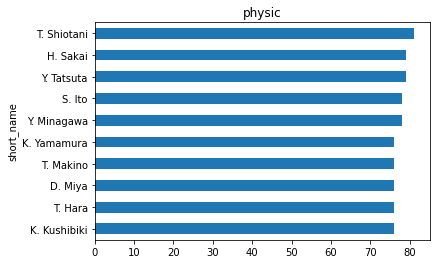

In [58]:
plt.subplot(1, 1, 1)
df2.sort_values(by="physic", ascending=False).head(10).set_index("short_name")["physic"].sort_values().plot(kind="barh")
plt.title("physic")

Text(0.5, 1.0, 'gk_diving')

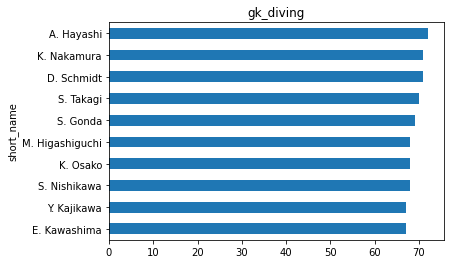

In [60]:
plt.subplot(1, 1, 1)
df2.sort_values(by="gk_diving", ascending=False).head(10).set_index("short_name")["gk_diving"].sort_values().plot(kind="barh")
plt.title("gk_diving")

Text(0.5, 1.0, 'gk_handling')

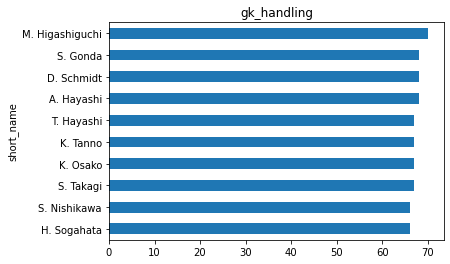

In [61]:
plt.subplot(1, 1, 1)
df2.sort_values(by="gk_handling", ascending=False).head(10).set_index("short_name")["gk_handling"].sort_values().plot(kind="barh")
plt.title("gk_handling")

Text(0.5, 1.0, 'gk_kicking')

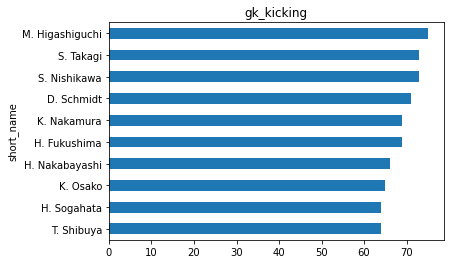

In [62]:
plt.subplot(1, 1, 1)
df2.sort_values(by="gk_kicking", ascending=False).head(10).set_index("short_name")["gk_kicking"].sort_values().plot(kind="barh")
plt.title("gk_kicking")

Text(0.5, 1.0, 'gk_reflexes')

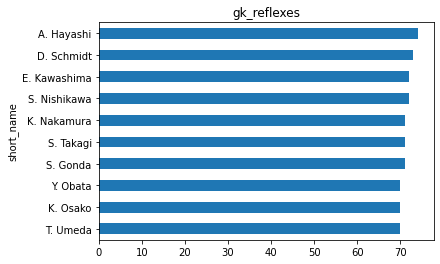

In [64]:
plt.subplot(1, 1, 1)
df2.sort_values(by="gk_reflexes", ascending=False).head(10).set_index("short_name")["gk_reflexes"].sort_values().plot(kind="barh")
plt.title("gk_reflexes")

Text(0.5, 1.0, 'gk_speed')

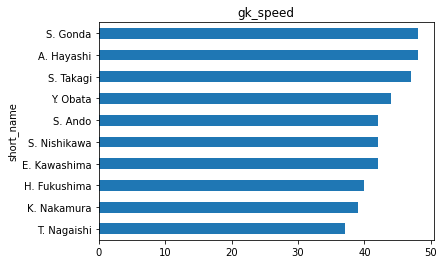

In [63]:
plt.subplot(1, 1, 1)
df2.sort_values(by="gk_speed", ascending=False).head(10).set_index("short_name")["gk_speed"].sort_values().plot(kind="barh")
plt.title("gk_speed")

Text(0.5, 1.0, 'gk_positioning')

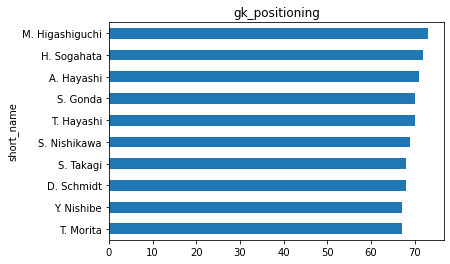

In [66]:
plt.subplot(1, 1, 1)
df2.sort_values(by="gk_positioning", ascending=False).head(10).set_index("short_name")["gk_positioning"].sort_values().plot(kind="barh")
plt.title("gk_positioning")

Text(0.5, 1.0, 'skill_fk_accuracy')

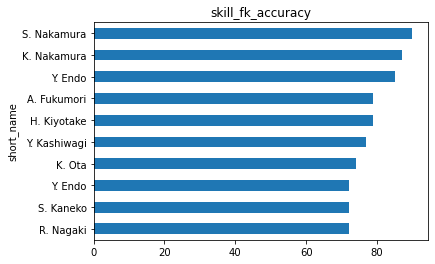

In [67]:
plt.subplot(1, 1, 1)
df2.sort_values(by="skill_fk_accuracy", ascending=False).head(10).set_index("short_name")["skill_fk_accuracy"].sort_values().plot(kind="barh")
plt.title("skill_fk_accuracy")